# Show sample finding 

In [1]:
import sys
import pandas as pd
import matplotlib.image as mpimg
import numpy as np
from IPython.display import HTML
from IPython.display import display

sys.path.append('../src')
import prostatex

In [2]:
screenshots_dir = "../data/ProstateX/train/screenshots/"
version = 0
dataset=prostatex.DataSet("../data/ProstateX/train/")

In [3]:
df = dataset.data()

In [4]:
from ipywidgets import *

proxId_widget = widgets.Dropdown(
    options=df['ProxID'].unique().tolist(),
    description='Patient:',
    disabled=False,
    button_style='' # 'success', 'info', 'warning', 'danger' or ''
)

fid_widget = widgets.Dropdown(
    options= df[df['ProxID'] == proxId_widget.value]['fid'].unique().tolist(),
    description='Finding:',
    disabled=False,
    button_style='' # 'success', 'info', 'warning', 'danger' or ''
)

name_widget = widgets.Dropdown(
    options=df[(df['ProxID'] == proxId_widget.value) & (df['fid'] == fid_widget.value)]['Name'].unique().tolist(),
    description='Name:',
    disabled=False,
    button_style='' # 'success', 'info', 'warning', 'danger' or ''
)


def update_widgets(*args):
    proxId = proxId_widget.value
    name = name_widget.value
    fid = fid_widget.value
        
    fid_widget.options = df[df['ProxID'] == proxId]['fid'].unique().tolist()
    name_widget.options = df[(df['ProxID'] == proxId) & (df['fid'] == fid)]['Name'].unique().tolist()
    
    
proxId_widget.observe(update_widgets, 'value')
name_widget.observe(update_widgets, 'value')
fid_widget.observe(update_widgets, 'value')

def printer(proxId, name, fid):
    print(proxId, name,fid)

In [6]:
setup = {}

def set_variables():
    proxId = proxId_widget.value
    name = name_widget.value
    fid = fid_widget.value
    model = prostatex.Model(df[(df['ProxID'] == proxId) & (df['Name'] == name) & (df['fid'] == fid)].iloc[version])
    setup['model'] = model
    setup['dcm'] = model.dcm(dataset)[0]
    print(model.dim())
    print(setup['dcm'].shape)
    setup['finding_screenshot'] = mpimg.imread(model.screenshot_file(dataset))
    
set_variables()

ProstateX-0000/1.3.6.1.4.1.14519.5.2.1.7311.5101.158323547117540061132729905711/1.3.6.1.4.1.14519.5.2.1.7311.5101.339319789559896104041345048780 0 19
[84, 128, 19, 1]
(84, 128, 19)


In [7]:
from matplotlib import pyplot, cm, gridspec
from numpy import *

def show_image(dcm,finding_screenshot,x,y,slide):
    dpi = 10
    tm = array(dcm[:, :,slide]).T
    tm_n = (tm - mean(tm)) / std(tm)
    fig = pyplot.figure(figsize=(dcm.shape[0]/dpi, 2*dcm.shape[1]/dpi), dpi=dpi)
    
    pyplot.subplot2grid((1,3), (0,0))
    pyplot.imshow(tm, cmap='Greys_r')
    pyplot.axis('off')
    
    pyplot.subplot2grid((1,3), (0,1))
    pyplot.scatter([x], [y], s=[10], c='r')
    pyplot.imshow(tm_n, cmap='Greys_r')
    pyplot.axis('off')
    
    pyplot.subplot2grid((1,3), (0,2))
    pyplot.imshow(finding_screenshot, cmap='Greys_r')
    pyplot.axis('off')
    pyplot.show()
    return fig

In [8]:
def update(proxId, name, fid):
    setup['proxId'] = proxId
    setup['name'] = name
    setup['fid'] = fid
interact(update,proxId=proxId_widget, name=name_widget,fid = fid_widget)

<function __main__.update>

In [9]:
def doUpdate(button):
    set_variables()
    z_w.max = setup['dcm'].shape[2]-1
    z_r_w.max = setup['dcm'].shape[2]-1
    
    
btn = widgets.Button(
    description='Load',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Load data',
    icon='check'
)

btn.on_click(doUpdate)
display(btn)

In [10]:
print(setup['model'])

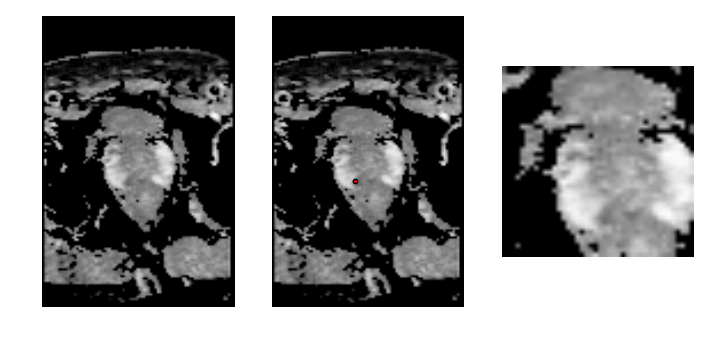

In [13]:
z_w = IntSlider(min=0,max=setup['dcm'].shape[2]-1,step=1,value=setup['model'].ijk()[2])

def display_image(z):
    dcm = setup['dcm']
    x,y,z = setup['model'].ijk()
    show_image(dcm,setup['finding_screenshot'],x,y,slide=z)

def display_image_update(button):
    z_w.max = setup['dcm'].shape[2]-1
    z_w.value = setup['z']
    
    
di_btn = widgets.Button(description='Reload',  icon='check')
di_btn.on_click(display_image_update)
display(di_btn)
display_image_i =  interact(display_image,z=z_w)

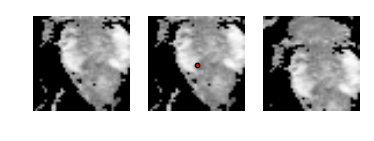

In [19]:
import features 

z_r_w = IntSlider(min=0,max=setup['dcm'].shape[2]-1,step=1,value=setup['model'].ijk()[2])
def display_image_region(z):
    dcm = setup['dcm']
    x,y,z = setup['model'].ijk()
    dcm_region = features.region3d(dcm,x,y,int(dcm.shape[0]/4))
    show_image(dcm_region,setup['finding_screenshot'],dcm_region.shape[0]/2,dcm_region.shape[1]/2,slide=z)

def display_image_region_update(button):
    z_r_w.max = setup['dcm'].shape[2]-1
    z_r_w.value = setup['z']
    
    
    
dir_btn = widgets.Button(description='Reload',  icon='check')
dir_btn.on_click(display_image_region_update)
display(dir_btn)
display_image_region_i = interact(display_image_region,z=z_r_w)